Predict the daily demand of Energy in a 110 kV substation. Features used are:-
- Date
- Average Room Temperature
- Number of supply interruptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Project Data.xlsx')
df= df.drop('Unnamed: 0', axis = 1)   
df.head()

,Date,Duration of Interruption,No. of Interruption,Average Temperature,total energy per day(MWH)
0,2021-08-01,82,17,28.5,872000
1,2021-08-02,484,28,25.5,904000
2,2021-08-03,577,30,27.5,832000
3,2021-08-04,97,21,27.0,852000
4,2021-08-05,102,12,27.0,904000


In [3]:
df.corr()

,Duration of Interruption,No. of Interruption,Average Temperature,total energy per day(MWH)
Duration of Interruption,1.000000,0.114754,0.036499,-0.015441
No. of Interruption,0.114754,1.000000,-0.020660,-0.065573
Average Temperature,0.036499,-0.020660,1.000000,0.300883
total energy per day(MWH),-0.015441,-0.065573,0.300883,1.000000


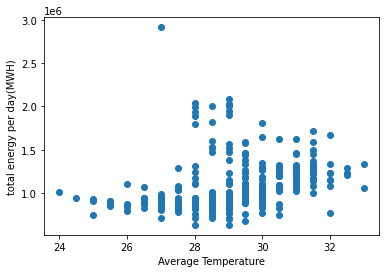

In [4]:
plt.scatter(df['Average Temperature'], df['total energy per day(MWH)'])
plt.xlabel('Average Temperature')
plt.ylabel('total energy per day(MWH)')
plt.show()

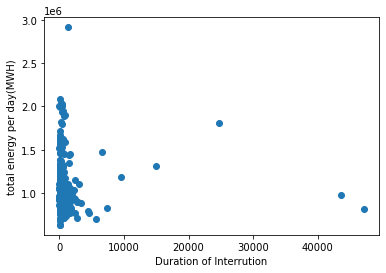

In [5]:
plt.scatter(df['Duration of Interruption'], df['total energy per day(MWH)'])
plt.xlabel('Duration of Interrution')
plt.ylabel('total energy per day(MWH)')
plt.show()

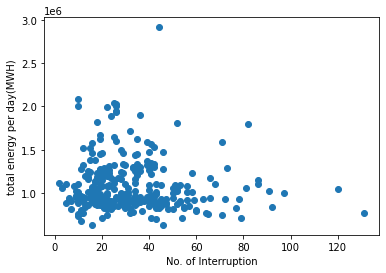

In [6]:
plt.scatter(df['No. of Interruption'], df['total energy per day(MWH)'])
plt.xlabel('No. of Interruption')
plt.ylabel('total energy per day(MWH)')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Date'] = encode.fit_transform(df['Date'])

In [18]:
features = ['Date','Average Temperature', 'No. of Interruption']
x = df[features]
y = df['total energy per day(MWH)']

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=3200, max_leaf_nodes=700, random_state=7)

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=5)

In [43]:
xtrain = scale.fit_transform(xtrain)
xtest = scale.transform(xtest)

In [44]:
model.fit(xtrain, ytrain)

RandomForestRegressor(max_leaf_nodes=700, n_estimators=3200, random_state=7)

In [45]:
pred = model.predict([[23-5-2021, 27, 38]])
pred

array([1105901.875])

In [46]:
model.score(xtest,ytest)

0.8265021371815393

In [47]:
# model.fit(x, y)

In [ ]:
# import joblib
# filename = 'Finalised model.sav'
# joblib.dump(model, filename)

In [ ]:
# joblib.dump(encode, "encoded.sav")
# joblib.dump(scale, "scaled.sav")

In [ ]:
# df.info()